# Prologue

## imports &c.

In [151]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns',100)
# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [152]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False) 
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [153]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
 
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index 
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [154]:
path = './data/ames-housing-dojo-for-ml.csv'
df = pd.read_csv(path, index_col='PID')
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,3,2006,3.0,1.0
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,4,2007,1.0,0.0
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,6,2008,3.0,0.0
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,2,2007,3.0,0.0


In [155]:
df.isna().sum()

MS Zoning              0
Lot Frontage         490
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        160
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
SalePrice              0
Month                  0
Year                   0
Total Full Baths       2
Total Half Baths       5
dtype: int64

<Axes: >

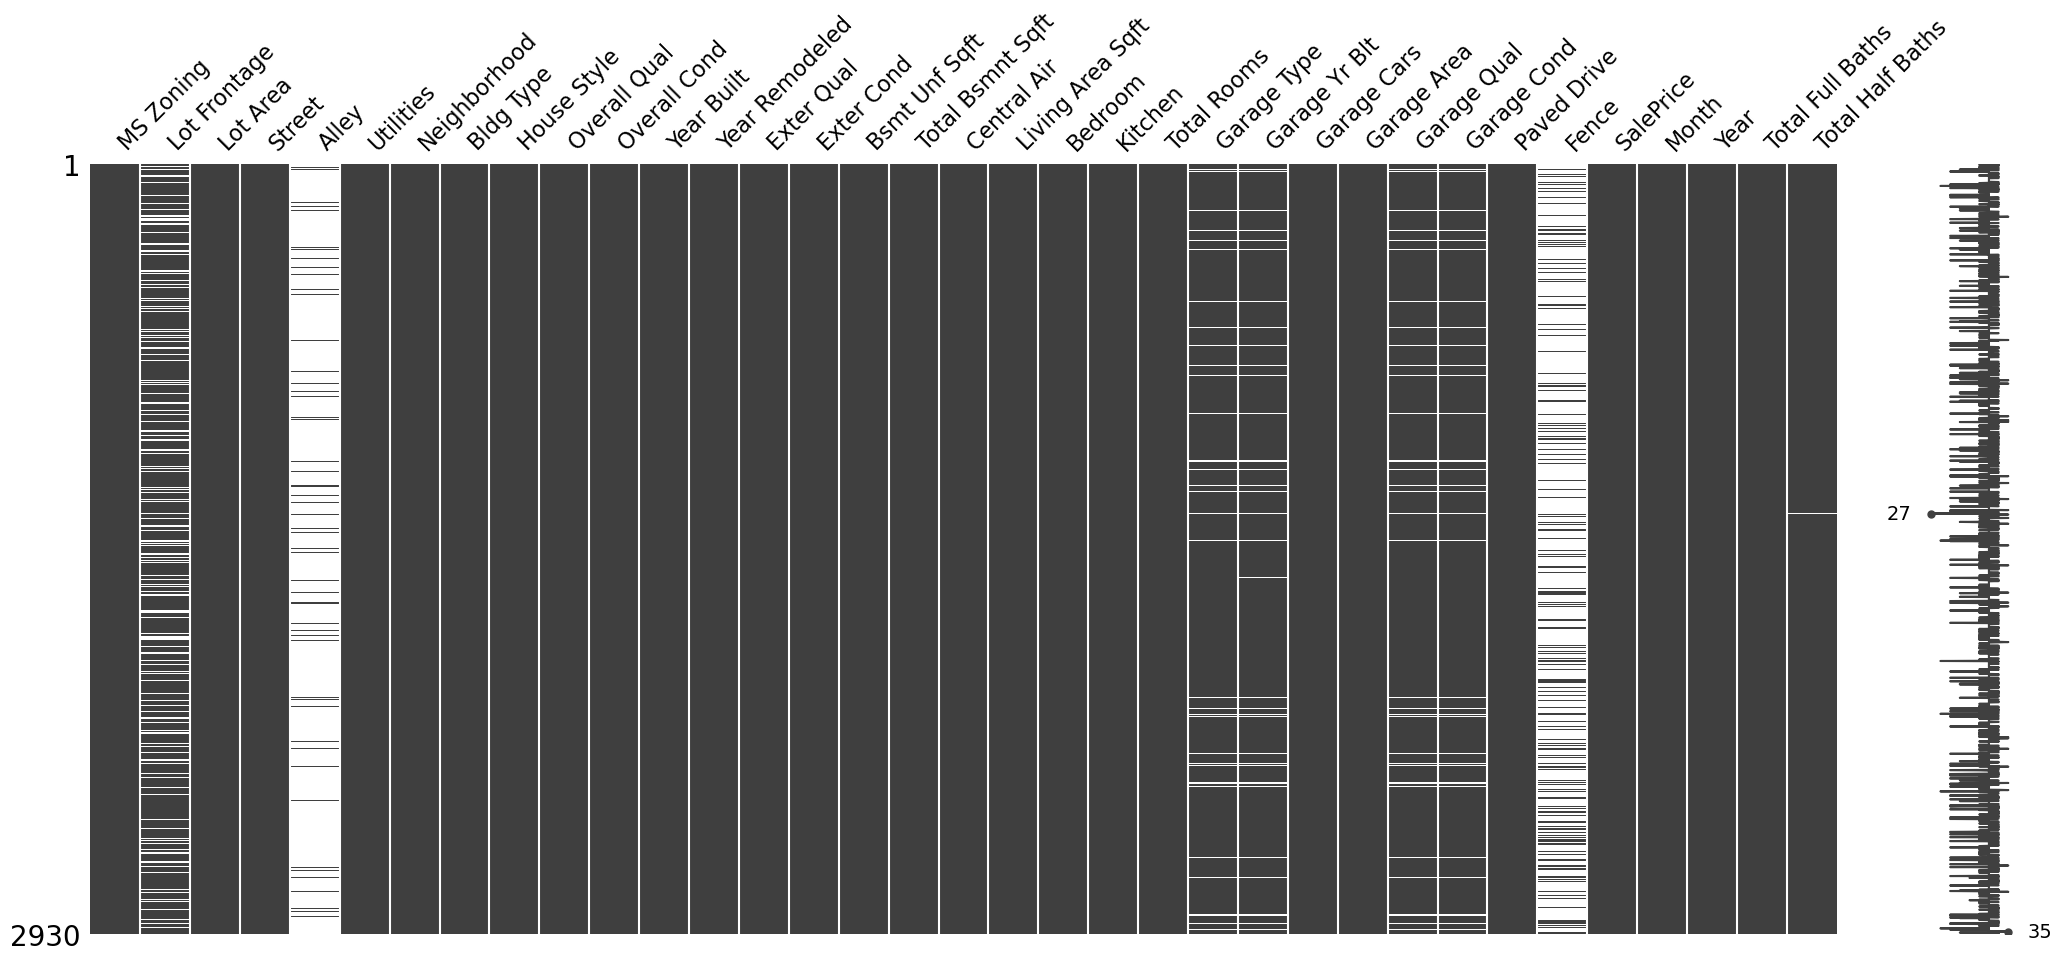

In [156]:
msno.matrix(df)


In [157]:
null_count = df.isna().sum()
null_count[null_count > 0]

Lot Frontage         490
Alley               2732
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Garage Type          157
Garage Yr Blt        160
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Fence               2358
Total Full Baths       2
Total Half Baths       5
dtype: int64

## Prepare data

### train/test split

In [158]:
# list of cols to drop
drop_from_model = ['Utilities', "Street",'MS Zoning','Lot Frontage',
                   'Lot Area','Neighborhood','Year Built']

X = df.drop(columns = [*drop_from_model,'SalePrice'])
y = df['SalePrice']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Alley,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,
905475520,NaN,1Fam,1Story,4,5,1994,TA,TA,0.0,0.0,N,943.0,3,1,5,Detchd,1958.0,1.0,308.0,TA,TA,N,NaN,8,2007,1.0,0.0
909254010,NaN,1Fam,2Story,7,8,1990,TA,TA,600.0,600.0,Y,1228.0,3,1,6,Detchd,1918.0,1.0,215.0,Fa,TA,Y,MnPrv,5,2009,1.0,0.0
531450090,NaN,1Fam,1Story,6,5,1991,TA,TA,78.0,1278.0,Y,1294.0,3,1,6,Attchd,1991.0,2.0,496.0,TA,TA,Y,GdWo,6,2008,3.0,0.0
903400040,Pave,1Fam,2Story,6,6,1950,TA,TA,764.0,764.0,Y,1824.0,3,1,8,Detchd,1940.0,2.0,520.0,TA,TA,N,GdPrv,7,2007,1.0,0.0
527107130,NaN,1Fam,SLvl,7,5,1997,TA,TA,100.0,384.0,Y,1628.0,3,1,7,BuiltIn,1996.0,2.0,390.0,TA,TA,Y,NaN,6,2009,2.0,1.0


In [160]:
num_cols = X_train.select_dtypes("number").columns
# num_cols = list(num_cols)
num_cols

Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths', 'Total Half Baths'],
      dtype='object')

In [161]:
obj_cols = X.select_dtypes('object').columns
# obj_cols = list(obj_cols)
obj_cols

Index(['Alley', 'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond',
       'Central Air', 'Garage Type', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Fence'],
      dtype='object')

### number preprocessors

In [162]:
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)

# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)

### string preprocessors

In [163]:
str_imputer = SimpleImputer(strategy='constant', fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

obj_pipe = make_pipeline(str_imputer, ohe_encoder)
obj_tuple = ('categorical', obj_pipe, obj_cols)

In [164]:
obj_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Alley', 'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond',
        'Central Air', 'Garage Type', 'Garage Qual', 'Garage Cond',
        'Paved Drive', 'Fence'],
       dtype='object'))

### Transforming the data

In [165]:
col_transformer = ColumnTransformer([num_tuple, obj_tuple], verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond',
       'Central Air', 'Garage Type', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [166]:
# obj_cols
num_cols

Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths', 'Total Half Baths'],
      dtype='object')

In [167]:
col_transformer.fit(X_train)

X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)

In [168]:
# 4) Once you have transformed X_train and X_test, (X_train_tf, and X_test_tf), add one more round of scaling that will also scale the one hot encoded features.


In [169]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

In [170]:

# 5A) Instantiate a PCA object that will find the first 3 principal components (set n_components=3).
from sklearn.decomposition import PCA


pca = PCA(n_components=3)

In [171]:
# 5B) Fit the PCA object on the scaled X_train data and transform both the scaled_X_train and scaled_X_test to create X_train_pcs and X_test_pcs.
X_train_pcs = pca.fit(X_train_tf).transform(X_train_tf)
X_test_pcs = pca.transform(X_test_tf)


In [172]:
# 6) Run code to determine the amount of variance explained by the 3 Principal Components.


# Get the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27691519, 0.11491808, 0.07449283])

In [173]:

# 7) Combine the dataset for EDA:  Concatenate X_train_pcs, X_test_pcs, and y_train and y_test back into a single DataFrame with the 3 PCs and the target as the columns and all of the data as the rows. 

# Tip: Use pd.concat() 3 times. 
# First, to combine X_train_pcs and y_train into plot_df_train using axis=1. 
# Second, combine X_test_pcas and y_test into plot_df_test using axis=1
# Finally, combine the 2 combined data frames (plot_df_train, plot_df_test) into 1 final combined plot_df using axis=0.
# 8) Make a seaborn pairplot of the data.

# 9) Make a 3d scatter plot with Plotly Express.



In [174]:
# # plt.plot?

# def floop(b, *a, **c):

#   thing = b
#   thing2 = a[0]

#   for i in a:
#     print(f'b: {b}')
#     print(f'a: {i}')


#   for j in c.keys():

#     print(f'{j} is {c[j]}')

# floop(1,2, 3,4, 5, color='blue', size='large', hp=100)

In [176]:
# trim whitespace from markdown cells

# import nbformat as nbf

# def trim_whitespace_in_notebook(notebook_path):
#     # Read the notebook
#     with open(notebook_path) as f:
#         nb = nbf.read(f, as_version=4)

#     # Iterate over all cells
#     for cell in nb.cells:
#         # Check if the cell is a markdown cell
#         if cell.cell_type == 'markdown':
#             # Trim leading and trailing whitespace from the cell content
#             cell.source = cell.source.strip()

#     # Write the modified notebook back to the file
#     with open(notebook_path, 'w') as f:
#         nbf.write(nb, f)

# # Use the function
# trim_whitespace_in_notebook('W1-C1 PCA Exercise (Core).ipynb')